In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.11.0


In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


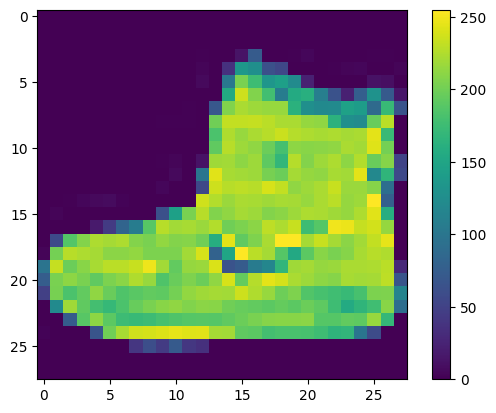

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)


In [25]:
train_images = train_images / 255.
test_images = test_images / 255.


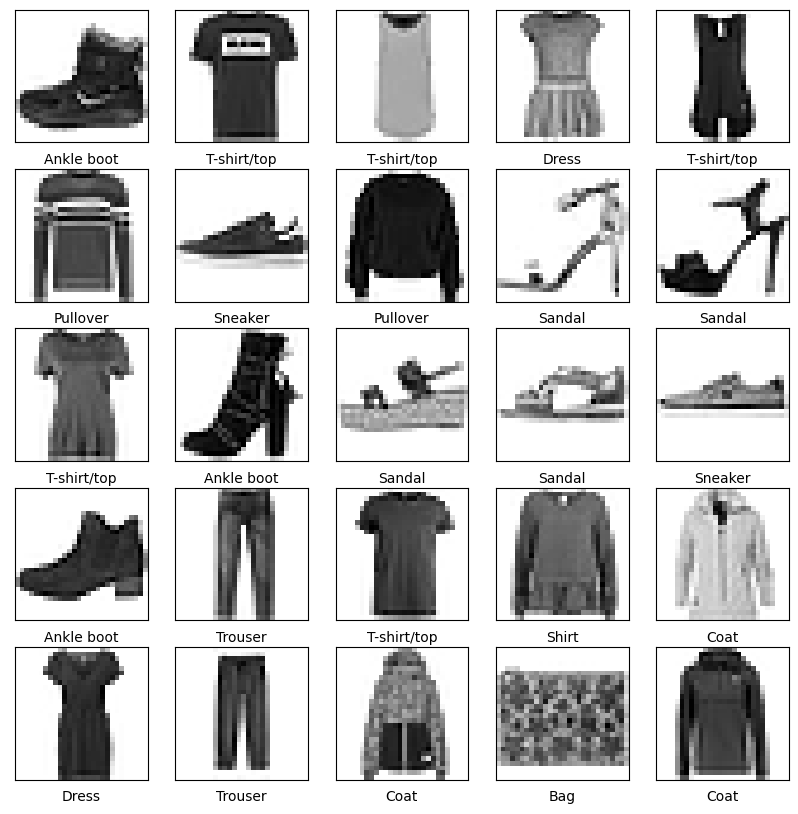

In [41]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='binary')
    plt.xlabel(class_names[train_labels[i]])


In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10),
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [47]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4219 - accuracy: 0.8516
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4151 - accuracy: 0.8542
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4096 - accuracy: 0.8557
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4040 - accuracy: 0.8574
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3986 - accuracy: 0.8590
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3938 - accuracy: 0.8607
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3898 - accuracy: 0.8619
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3858 - accuracy: 0.8631
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3818 - accuracy: 0.8652
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.378

In [50]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print(f'Test accuracy: {test_acc}')


313/313 - 0s - loss: 0.4159 - accuracy: 0.8518 - 289ms/epoch - 922us/step
Test accuracy: 0.8518000245094299


In [58]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 893us/step


In [63]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


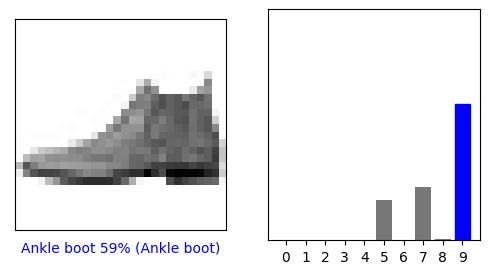

In [73]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


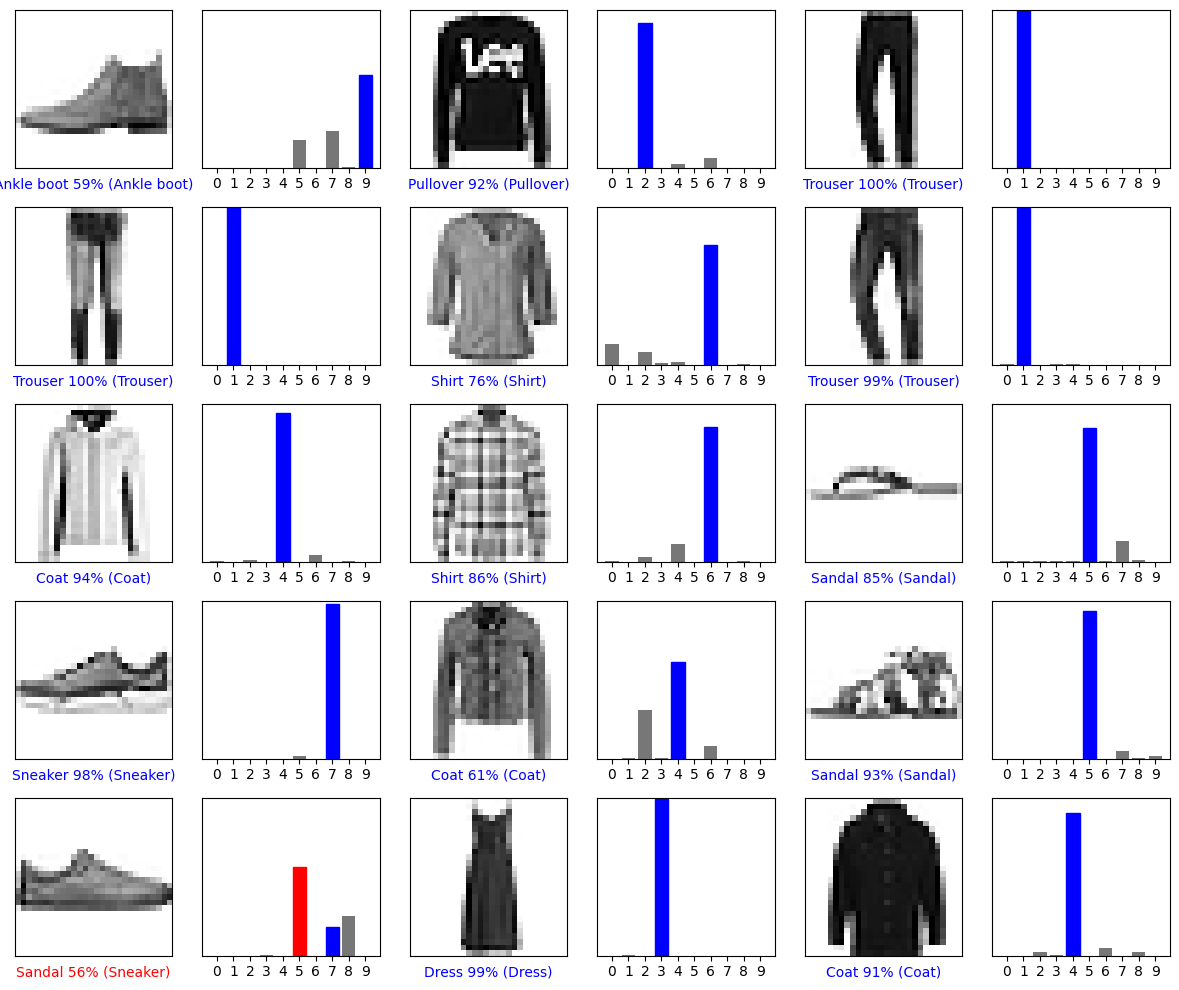

In [79]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 15ms/step


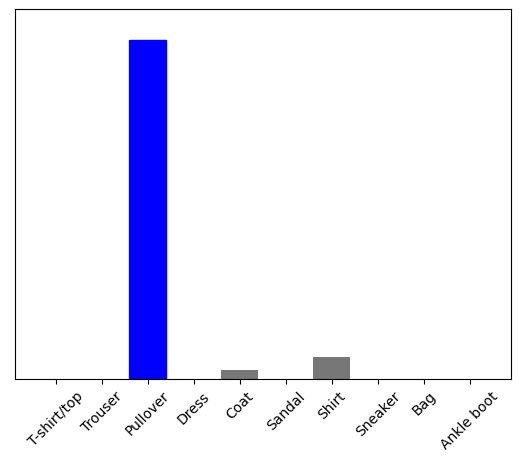

In [89]:
img = test_images[1]
img = np.expand_dims(img,0)

predictions_single = probability_model.predict(img)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
